In [1]:
# import packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import dabl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

import warnings
warnings.filterwarnings('ignore')

Exercise Steps
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call.
In your quest, you might need to ask a bunch of other questions, such as:
● Can I count something interesting?
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
● Can I make a bar plot or a histogram?
● Can I compare two related quantities?  
● Can I make a scatterplot?
● Can I make a time-series plot?
● Looking at the plots, what are some insights I can make?
● Can I see any correlations?
● Is there a hypothesis I can - and should - investigate further?
● What other questions are the insights leading me to ask? 

In [2]:
# load data set
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:

#look at size of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


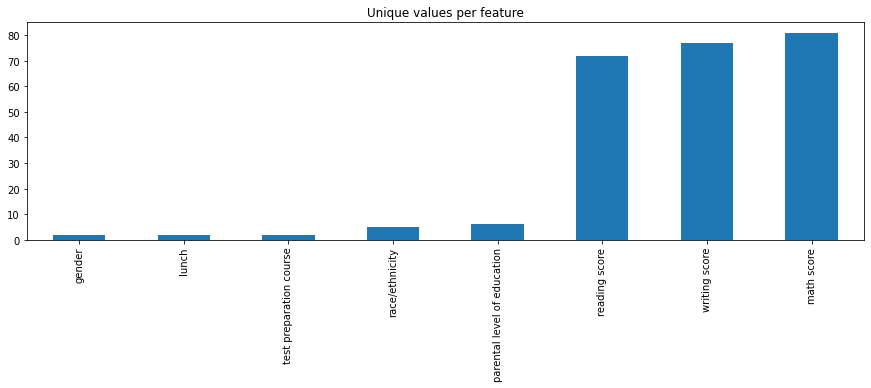

In [4]:
# find number of unique entries for each features
unique_values = df.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

In [5]:
## get more detail on categorical features 

df[['gender', 'race/ethnicity', 'parental level of education',
    'lunch','test preparation course']].nunique()



gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

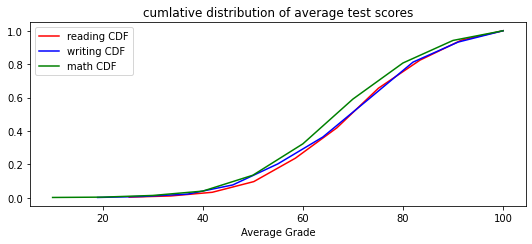

In [6]:
# put cdf of the three here 

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True



count, bins_count = np.histogram(df['reading score'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="reading CDF", color ='r')


count, bins_count = np.histogram(df['writing score'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="writing CDF", color ='b')

count, bins_count = np.histogram(df['math score'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="math CDF", color ='g')

plt.legend()
plt.xlabel('Average Grade')
plt.title('cumlative distribution of average test scores')
plt.show()

Math seems to have the lowest average as the cdf increases quicker than the other two. all 3 seems to have fairly normal distributions 

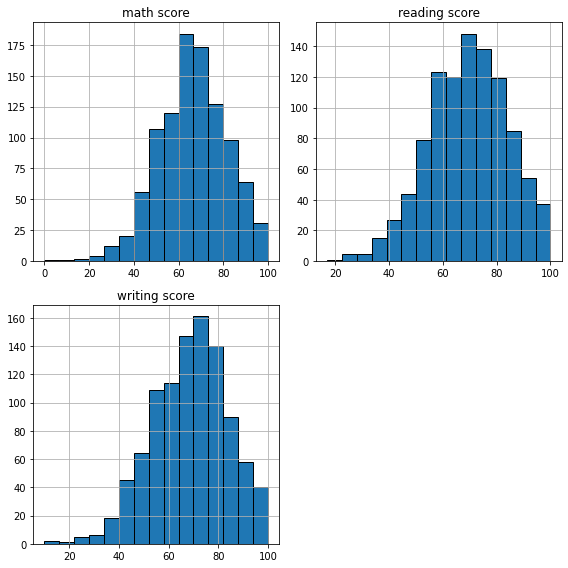

In [7]:
# Plots the histogram for each numerical feature in a separate subplot

df.hist(bins=15, edgecolor="black",figsize=(8,8))
plt.tight_layout();


Histograms confirm cdf observations.

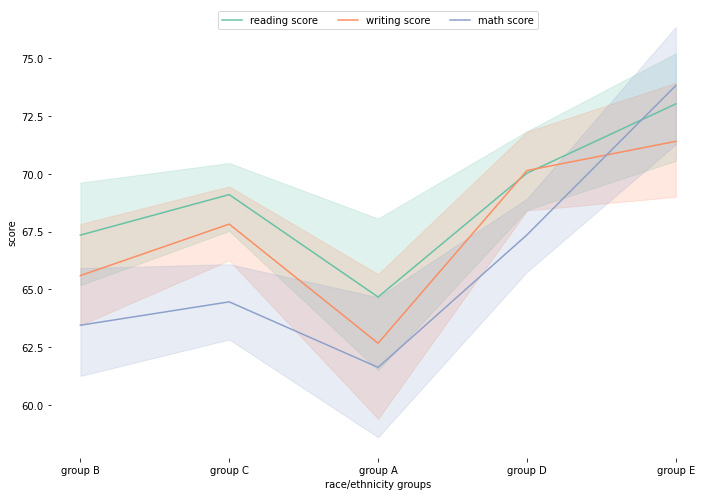

In [8]:
df1 = df[['race/ethnicity','reading score', 'math score', 'writing score']]
df1 = df1.set_index('race/ethnicity')



f, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x = df1.index, y = df1['reading score'] , label='reading score',   color=sns.color_palette("Set2", 10)[0])
sns.lineplot(x = df1.index, y = df1['writing score' ], label='writing score',   color=sns.color_palette("Set2", 10)[1])
sns.lineplot(x = df1.index, y = df1['math score'], label='math score',   color=sns.color_palette("Set2", 10)[2])

plt.ylabel("score")
plt.xlabel('race/ethnicity groups')
ax.legend(ncol=5, loc="upper center", frameon=True)
sns.despine(left=True, bottom=True)

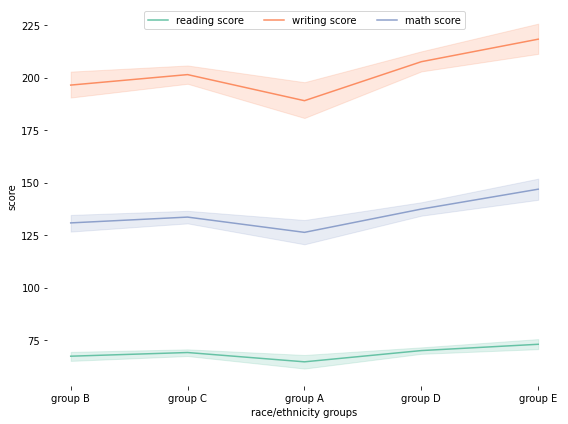

In [9]:
df2 = df1.cumsum(axis=1)
f, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x = df2.index, y = df2['reading score'] , label='reading score',   color=sns.color_palette("Set2", 10)[0])
sns.lineplot(x = df2.index, y = df2['writing score' ], label='writing score',   color=sns.color_palette("Set2", 10)[1])
sns.lineplot(x = df2.index, y = df2['math score'], label='math score',   color=sns.color_palette("Set2", 10)[2])

plt.ylabel("score")
plt.xlabel('race/ethnicity groups')
ax.legend(ncol=5, loc="upper center", frameon=True)
sns.despine(left=True, bottom=True)

In [10]:
# group A has the lowest averages in scores 

<AxesSubplot:xlabel='total_score', ylabel='parental level of education'>

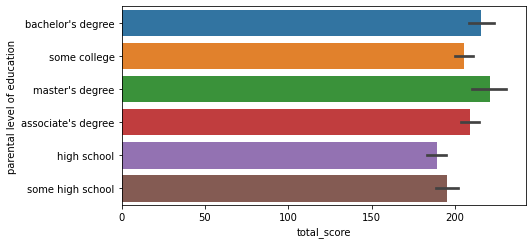

In [11]:
df['total_score'] = sum([df['math score'], df['reading score'], df['writing score']])

sns.barplot(x=df['total_score'], y=df['parental level of education'])

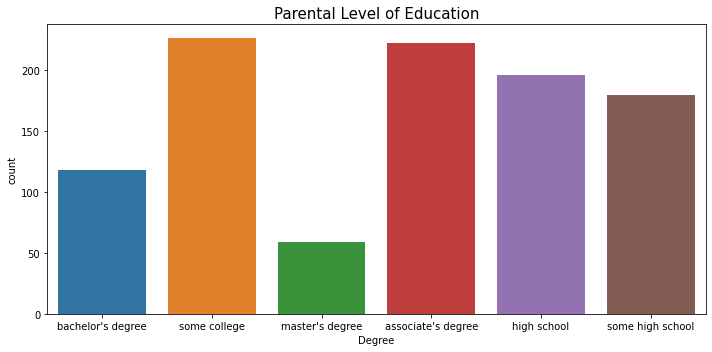

In [12]:
plt.subplots(figsize=(10,5))
sns.countplot(df['parental level of education'])
plt.xlabel('Degree')
plt.title(label = 'Parental Level of Education', fontsize=15,)
plt.show()

In [13]:
df.groupby('parental level of education')['total_score'].mean().sort_values(ascending = True)

parental level of education
high school           189.290816
some high school      195.324022
some college          205.429204
associate's degree    208.707207
bachelor's degree     215.771186
master's degree       220.796610
Name: total_score, dtype: float64

In [14]:
# more parental educations shows to have some correlation too test scores

In [15]:
## map categorical variables for numerical value correlation heat map 

le = LabelEncoder()

df['lunch'] = le.fit_transform(df['lunch'])
df['gender'] = le.fit_transform(df['gender'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

df['test preparation course'] = le.fit_transform(df['test preparation course'])
# df['test preparation course'] = df['test preparation course'].fillna(value=2).astype('int64')
df[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,0,1,1,1,1,72,72,74,218
1,0,2,4,1,0,69,90,88,247
2,0,1,3,1,1,90,95,93,278


In [20]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score'],
      dtype='object')

In [ ]:
df['avg_score'] = nop

In [16]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


count, bins_count = np.histogram(df['avg_score'], bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.xlabel('Average Grade')
plt.title('cumlative distribution of average test scores')
plt.show()

KeyError: 'avg_score'

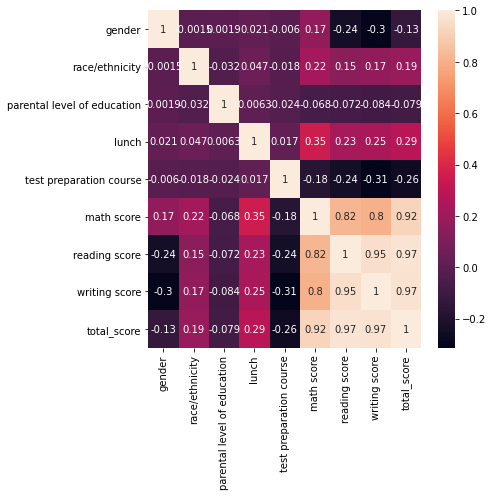

In [17]:

# look for correlations between features 
plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
# lunch and math scores have the highest correlation , accounting for 35 % of the variation. 

Target looks like regression


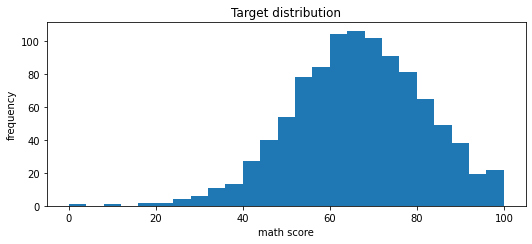

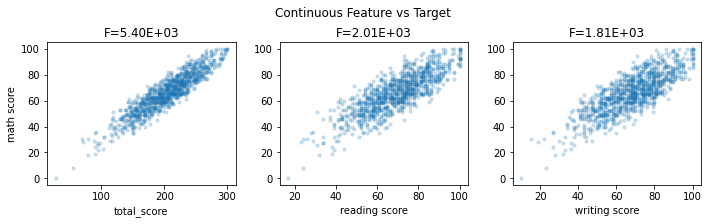

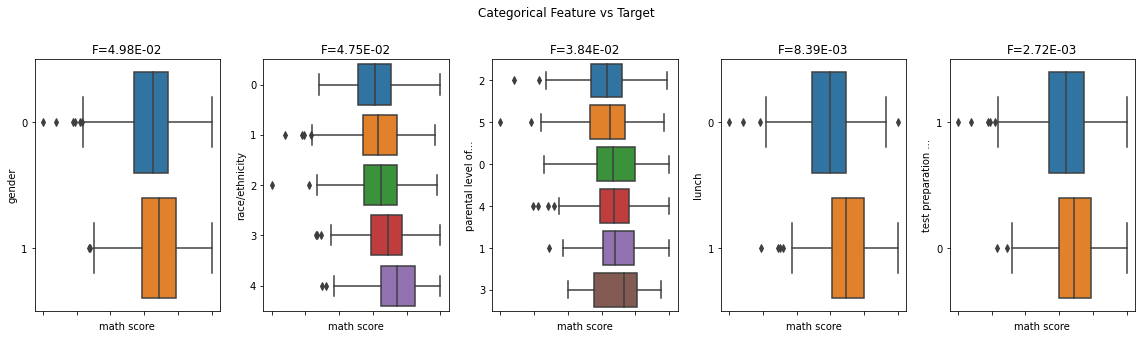

In [19]:
# use dabl to look at relationships to math scores
dabl.plot(df, target_col = 'math score')
plt.show()

- The direct relations ship of the scatter plots shows the high correlation seen in the heatmap with over 80% of variation of the math scores explained by the other two test scores.

- boxplots show slight variation in scores between parental level of education and race. 

- the 35% correlation between lunch and math scores can be seen in the seperation between the two boxplots. 